<a href="https://colab.research.google.com/github/harikaeadara/projects/blob/main/house_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_csv('/content/Housing.csv')

In [ ]:
# head method to check aboce 5 entries of the datasets
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: >

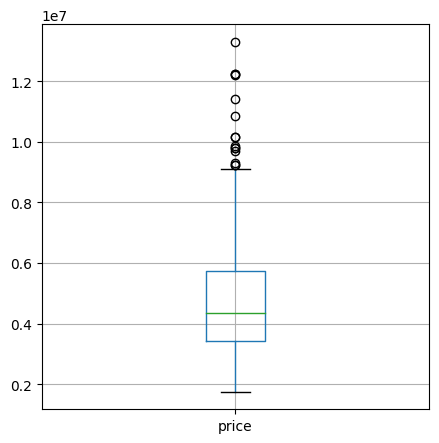

In [ ]:
df.boxplot(['price'], figsize=(5, 5))


In [ ]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [ ]:
# check the column name
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

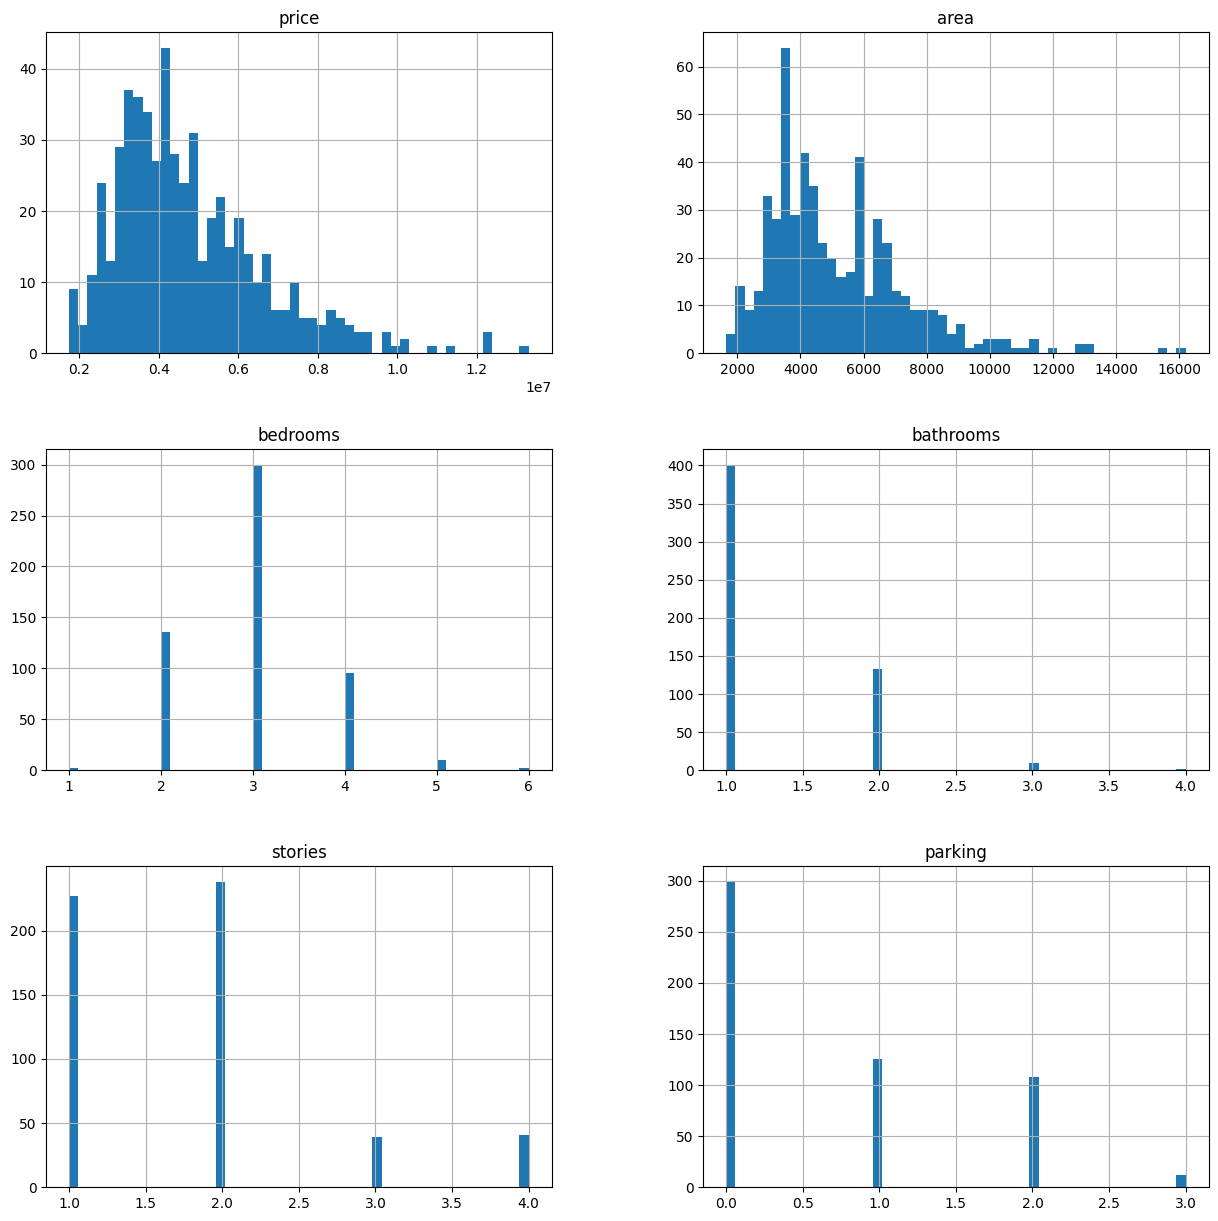

In [ ]:
df.hist(bins=50, figsize=(15, 15))

After creating histograms with the variables, we can see that there is skewness towards the right with the price and area variables. To further confirm whether these variables are skewed to the right, we will look at the coefficient of skewness.

In [ ]:
df['price'].skew()

1.2122388370279802

In [ ]:
df['area'].skew()


1.321188343153483

We can see that both the coefficients are positive and not close to 0. This confirms that these two variables are skewed to the right/ have positive skewness. We would need to transform the data before we can do predictions on it.

In [ ]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


There is no highly correlated variables, indicating there is no collinearity which may cause the model to over fit

In [ ]:
price_log = np.log(df['price'])
price_log.skew()

0.14086257299872787

<Axes: >

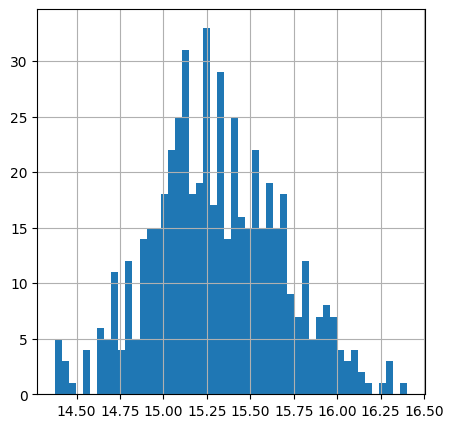

In [ ]:
price_log.hist(bins=50, figsize=(5, 5))


We can see that after log transforming the price data, the data has normalised, with a skewness coefficient of 0.14 and we further confirmed this with a visualisation.

In [ ]:
# checking the dimensions of the dataset
df.shape

(545, 13)

In [ ]:
# checking the datatypes of the variable
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
# To check individual column type
type(df['price'])

pandas.core.series.Series

In [ ]:
# To check the individual column entries
df[['price']]

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
# Check column unique value counts
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
# As the machine learning model doesn't understand the text so we need to change the text to int
# First step to append the objects to a certain list

cat_col_list = list(df.select_dtypes('object').columns)
cat_col_list

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [ ]:
# Direct method to append the complete columns to a variable

df_cat = df.select_dtypes('object')
df_cat

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [ ]:
# To change the text to numerical value there are certain methods
# Import following classes
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [ ]:
# A complete process to change the text values to numerical values
# Label Binarizer can only change 2 values to 0 or 1
# label Encode can change more then 2 uniqu values to intergers.

label_binarizer_cols = []
label_encoder_col = []

In [ ]:
# Assigning the columns to respective lists

for each_col in df_cat.columns:
    if len(df_cat[each_col].unique()) == 2:
        label_binarizer_cols.append(each_col)
    else:
        label_encoder_col.append(each_col)
    print(df_cat[each_col].unique())

['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']


In [ ]:
# Conversion of Binarizer values and updation of the datasets

lb_obj = {}
for each_col in label_binarizer_cols:
    lb = LabelBinarizer()
    lb_obj[each_col] = lb
    df[each_col] = lb.fit_transform(df[each_col])

In [ ]:
# Data Set View 
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [ ]:
# Conversion of Encoder values and updation of the datasets

le_obj = {}
for each_col in label_encoder_col:
    le = LabelEncoder()
    le_obj[each_col] = le
    df[each_col] = le.fit_transform(df[each_col])

In [ ]:
# Data Base View

df[['furnishingstatus']]

,furnishingstatus
0,0
1,0
2,1
3,0
4,0
...,...
540,2
541,1
542,2
543,0


In [ ]:
# Assigning of the necessary variable 

x = df.drop('price', axis = 1)
y = df['price']

In [ ]:
x.head(5)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
y.head()


0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [ ]:
# Model Building using 2 different algorithms

from sklearn.linear_model import LinearRegression, RidgeCV

In [ ]:
# Linear Regression model
# Assigning the algorithm to the variable
lr = LinearRegression()

# Fitting of the model
lr.fit(x,y)

LinearRegression()

In [ ]:
# Prediction of the first 50 entries
lr.predict(x)[1:50]

array([10638380.23666684,  7542628.07268391,  8408698.53020236,
        6771486.96259187,  8334747.49458948,  9710889.51208249,
        8514703.09449342,  7584399.24465678,  7717327.43527943,
        8410819.47648123,  8209030.40806562,  7046301.57103505,
        6167605.81723847,  6098291.56137894,  5060287.29954374,
        7501266.00075274,  8149146.47006861,  6595157.0812944 ,
        6895119.28922269,  5403985.36960561,  6699498.45778087,
        6075496.76011549,  6663541.52845016,  7321535.50104423,
        8192792.78781792,  8069632.6612009 ,  4553941.69895367,
        7304016.64916945,  7148125.69943508,  7472766.34770253,
        6581210.07040689,  6852164.85075369,  6713890.30012284,
        6469709.71705743,  7783286.13916524,  7837030.13481458,
        8390574.30017046,  6422145.90845984,  7165880.21952014,
        6229267.40137125,  7714670.05526346,  7230078.99486997,
        6592032.26201704,  7379068.00097786,  6316228.67806434,
        7259593.61451046,  7623676.33306

In [ ]:
# RidgeCV model
# Assigning the algorithm to the variable
rc = RidgeCV()

# Fitting of the model
rc.fit(x,y)

RidgeCV()

In [ ]:
# Prediction of the first 50 entries
rc.predict(x)[1:50]

array([10627865.97246383,  7543094.1502599 ,  8400910.20490546,
        6775254.78657274,  8315011.47567776,  9698175.24581422,
        8521925.35477147,  7582153.76334633,  7703934.70594639,
        8412987.52695582,  8167822.74507884,  7034718.237749  ,
        6132858.84006659,  6094765.19262323,  5072044.60011488,
        7487615.89875655,  8149228.58591033,  6587588.27157527,
        6881680.59244855,  5374076.82028906,  6690983.7506469 ,
        6075854.14715403,  6654858.57681993,  7319193.39516523,
        8182095.92566839,  8056446.10612828,  4564673.62086636,
        7273328.91552749,  7135366.45229471,  7469757.56402868,
        6585620.46424682,  6839918.63440744,  6707173.41259212,
        6473654.31796012,  7781850.50049288,  7798290.81474035,
        8392886.15894708,  6423540.59112422,  7163169.50287351,
        6222786.37464085,  7703965.12180151,  7226063.43403511,
        6599757.90476175,  7377384.16796338,  6309470.06757948,
        7256185.95673244,  7622967.70475